<a href="https://colab.research.google.com/github/SamH3pn3r/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Copy_of_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

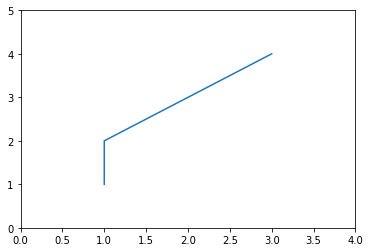

In [1]:
# Does not pass
import matplotlib.pyplot as plt

plt.plot([1,1,2,3],[1,2,3,4])
plt.axis([0,4,0,5])

plt.show();

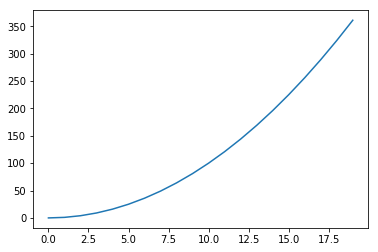

In [4]:
# Passes the vert line test
import numpy as np

t = np.arange(0,20)

plt.plot(t, t**2)

plt.show();

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because a single input is getting more than one output.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only 2 passes because each input only has one output.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

## For n
The input is in 3-D and the output is in 3-D

## For n
The input is in 4-D but the output is in 2-D.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

It is possible. You can map from $\mathbb{R}$ to $\mathbb{R}^2$ using the function: $f(x) = (x,x)$

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

Answers: 
\begin{align} 
T_p = \begin{bmatrix}
1 & 3 \\
-1 & 2
\end{bmatrix}
\end{align}


\begin{align}
T_q = \begin{bmatrix}
4 & 1 & 2 \\
-1 & 2 & 3 \\
5 & 1 & -2
\end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

Through the traditional method I got:
\begin{align}
p(\begin{bmatrix} 2 \\ 2 \end{bmatrix})
= \begin{bmatrix} 8 \\ 2 \end{bmatrix}
\end{align}

\begin{align}
q(\begin{bmatrix} 2 \\ 2 \\ 2 \end{bmatrix}) = \begin{bmatrix} 14 \\ 8 \\ 8 \end{bmatrix}
\end{align}

In [10]:
x = [2,2]
y = [2,2,2]

Tp = np.array([[1,3],[-1,2]])
Tq = np.array([[4, 1, 2],[-1,2,3],[5,1,-2]])

Tp_x = np.matmul(Tp,x)
Tq_y = np.matmul(Tq,y)

print(Tp_x)
print(Tq_y)

[8 2]
[14  8  8]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

To find where the transformation matrix loses a dimension, so that when we're computing the PCA, we know how to squeeze a huge dataset down to a more manageable size. 

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

It takes longer and it is harder to find our answer if we work with a high dimensional space. 
It's more difficult to explore the data and create visualizations.
We risk an overfitted line if we have more columns than rows.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have 5 times as many rows as columns.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [106]:
import pandas as pd
from numpy.linalg import eig
from sklearn.decomposition import PCA

iris_url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'

iris_data = pd.read_csv(iris_url)

y = iris_data['species']
x = iris_data.iloc[:,0:4]

x_mean = x.mean()
x_diff = x - x_mean
z = x_diff/np.std(x)

cov = z.cov()

values, vectors = eig(cov)

P = vectors.dot(z.T)

pca = PCA(2)
pca.fit(x)

B = pca.transform(x)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


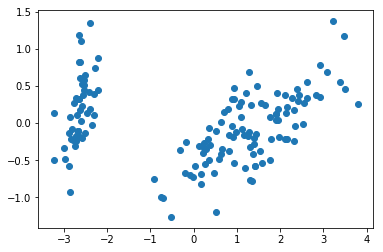

In [69]:
import matplotlib.pyplot as plt

plt.scatter(B[:,0],B[:,1])

plt.show();

In [0]:
pcaDf = pd.DataFrame(data = B, columns=['PC1', 'PC2'])
finalDf = pd.concat([pcaDf, yDf], axis=1)

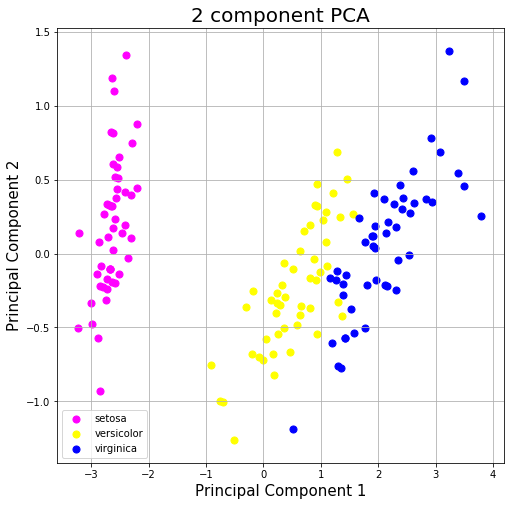

In [116]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['magenta', 'yellow', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(pcaDf.loc[indicesToKeep,'PC1'], 
               pcaDf.loc[indicesToKeep, 'PC2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)